In [21]:
import pandas as pd
import os

In [22]:
csv_file = '../raw_data/air_pollution_data.csv'
df = pd.read_csv(csv_file)

df.head(5)

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
0,4_Eur,ESP,Spain,A Coruna/ESP,2013.0,"V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...",23.238,11.491,28.841,87.0,46.0,93.0,"Urban, Urban, Suburban",NaN,NaN,246146.0,"manual, manual, manual, manual",43.367900,-8.418571,1
1,4_Eur,ESP,Spain,A Coruna/ESP,2014.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",27.476,15.878,19.575,96.0,88.0,95.0,"Urban, Urban, Suburban",NaN,NaN,247604.0,NaN,43.368033,-8.418233,1
2,4_Eur,ESP,Spain,A Coruna/ESP,2015.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",25.515,14.004,22.731,98.0,71.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1
3,4_Eur,ESP,Spain,A Coruna/ESP,2016.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",23.057,13.160,20.204,98.0,98.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1
4,4_Eur,ESP,Spain,A Coruna/ESP,2017.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",26.849,14.114,21.543,97.0,97.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1


# Explore!

In [23]:
# Get to know your features
# Missing values!
# Outliers
# Formats and types
# Check target balance
# and more....!

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40098 entries, 0 to 40097
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          40098 non-null  object 
 1   iso3                40098 non-null  object 
 2   country_name        40098 non-null  object 
 3   city                40098 non-null  object 
 4   year                40095 non-null  float64
 5   version             40098 non-null  object 
 6   pm10_concentration  28672 non-null  float64
 7   pm25_concentration  21730 non-null  float64
 8   no2_concentration   26934 non-null  float64
 9   pm10_tempcov        22403 non-null  float64
 10  pm25_tempcov        16590 non-null  float64
 11  no2_tempcov         23402 non-null  float64
 12  type_of_stations    23331 non-null  object 
 13  reference           6652 non-null   object 
 14  web_link            1790 non-null   object 
 15  population          22433 non-null  float64
 16  popu

## Missing values

In [25]:
(df.isnull().sum() /len(df) *100).sort_values(ascending=False).round(2)

web_link              95.54
reference             83.41
pm25_tempcov          58.63
population_source     54.86
pm25_concentration    45.81
pm10_tempcov          44.13
population            44.05
type_of_stations      41.82
no2_tempcov           41.64
no2_concentration     32.83
pm10_concentration    28.50
year                   0.01
longitude              0.00
latitude               0.00
who_region             0.00
iso3                   0.00
version                0.00
city                   0.00
country_name           0.00
who_ms                 0.00
dtype: float64

In [26]:
#Features to delete: web_link, reference,  iso3, who_ms, population_source, version, pm10_tempcov, pm25_tempcov, no2_tempcov
df.drop(columns=['web_link', 'reference', 'iso3', 'who_ms', 'population_source', 'version', 'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov'],inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40098 entries, 0 to 40097
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          40098 non-null  object 
 1   country_name        40098 non-null  object 
 2   city                40098 non-null  object 
 3   year                40095 non-null  float64
 4   pm10_concentration  28672 non-null  float64
 5   pm25_concentration  21730 non-null  float64
 6   no2_concentration   26934 non-null  float64
 7   type_of_stations    23331 non-null  object 
 8   population          22433 non-null  float64
 9   latitude            40098 non-null  float64
 10  longitude           40098 non-null  float64
dtypes: float64(7), object(4)
memory usage: 3.4+ MB


In [28]:
(df.isnull().sum() /len(df) *100).sort_values(ascending=False).round(2)

pm25_concentration    45.81
population            44.05
type_of_stations      41.82
no2_concentration     32.83
pm10_concentration    28.50
year                   0.01
who_region             0.00
country_name           0.00
city                   0.00
latitude               0.00
longitude              0.00
dtype: float64

In [29]:
for col in df.columns:
  print(df[col].unique())

['4_Eur' '6_Wpr' '2_Amr' '5_Emr' '1_Afr' '3_Sear' '7_NonMS']
['Spain' 'China' 'Germany' 'Switzerland' 'Denmark' 'Norway' 'Canada'
 'Belgium' 'Iran (Islamic Republic of)' 'Mexico' 'Georgia' 'Italy'
 'United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Saudi Arabia'
 'France' 'United Arab Emirates' 'Ghana' 'T√ºrkiye' 'Ethiopia' 'Australia'
 'India' 'Israel' 'Cyprus' 'Greece' 'Kuwait' 'Finland' 'Hungary' 'Sweden'
 'Iceland' 'Jordan' 'Qatar' 'Costa Rica' 'Portugal' 'Romania'
 'New Zealand' 'Algeria'
 'occupied Palestinian territory, including east Jerusalem' 'Austria'
 'Ecuador' 'Brazil' 'Netherlands (Kingdom of the)' 'Chile'
 'Republic of Korea' 'Madagascar' 'Colombia' 'Bulgaria' 'Turkmenistan'
 'Kazakhstan' 'Paraguay' 'Peru' 'Ireland' 'Malta' 'Poland' 'Thailand'
 'Lebanon' 'Belarus' 'Iraq' 'Cameroon' 'Philippines' 'Argentina' 'Bhutan'
 'Indonesia' 'Cambodia' 'Slovakia' 'Montenegro'
 'Venezuela (Bolivarian Republic of)' 'Bangladesh' 'Luxembourg' 'Malaysia'
 

In [30]:
df.duplicated().sum()

0

## Outliers

<Axes: >

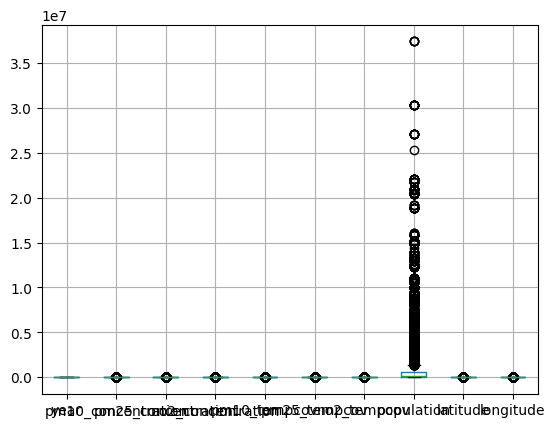

In [12]:
df.boxplot()

## target balance (classification only!)

In [13]:
df.head()


,who_region,iso3,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,population,latitude,longitude
0,4_Eur,ESP,A Coruna/ESP,2013.0,"V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...",23.238,11.491,28.841,87.0,46.0,93.0,"Urban, Urban, Suburban",246146.0,43.367900,-8.418571
1,4_Eur,ESP,A Coruna/ESP,2014.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",27.476,15.878,19.575,96.0,88.0,95.0,"Urban, Urban, Suburban",247604.0,43.368033,-8.418233
2,4_Eur,ESP,A Coruna/ESP,2015.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",25.515,14.004,22.731,98.0,71.0,98.0,"Urban, Urban, Suburban, Suburban",247604.0,43.370375,-8.422900
3,4_Eur,ESP,A Coruna/ESP,2016.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",23.057,13.160,20.204,98.0,98.0,98.0,"Urban, Urban, Suburban, Suburban",247604.0,43.370375,-8.422900
4,4_Eur,ESP,A Coruna/ESP,2017.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",26.849,14.114,21.543,97.0,97.0,98.0,"Urban, Urban, Suburban, Suburban",247604.0,43.370375,-8.422900


In [9]:
df.Survived.value_counts() / len(df)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Relatively balanced

# Preprocessing

In [ ]:
# Handling missing data
# Handling outliers
# Encoding
# Scaling
# Feature engineering.

## Drop too complex features for now...

In [39]:
df.drop(columns=['Ticket','Name'], inplace=True)

## Missing data

In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Cabin

drop for now, too much engineering...

In [14]:
df.drop(columns=['Cabin'], inplace=True)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Age

In [15]:
df.isnull().sum() / len(df)

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

age_imputer = KNNImputer(n_neighbors=5)

age_imputer.fit(df[['Age']])

KNNImputer()

In [33]:
df['Age'] = age_imputer.transform(df[['Age']])

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [34]:
df['Age'].isnull().sum()

0

### Embarked

In [29]:
df['Embarked'].isnull().sum()

2

In [30]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
import numpy as np

df['Embarked'] = df['Embarked'].replace(np.nan, 'U')

df.Embarked.value_counts()

S    644
C    168
Q     77
U      2
Name: Embarked, dtype: int64

In [37]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## Encode

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [58]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop='if_binary')

encoder.fit(df[['Sex','Embarked']])

encoder.transform(df[['Sex','Embarked']])

/Users/benjaminauzanneau/.pyenv/versions/3.8.12/envs/lewagon_current/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0.]])

In [59]:
encoder.get_feature_names_out()

array(['Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_U'],
      dtype=object)

In [60]:
list(encoder.get_feature_names_out())

['Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_U']

In [63]:
df[list(encoder.get_feature_names_out())] = encoder.transform(df[['Sex','Embarked']])

df.drop(columns=['Sex','Embarked'], inplace=True)

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,0,3,22.0,1,0,7.2500,1.0,0.0,0.0,1.0,0.0
1,1,1,38.0,1,0,71.2833,0.0,1.0,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,0.0,1.0,0.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,0.0,1.0,0.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,0.0,1.0,0.0


### Scale

In [66]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaler.fit(df.drop(columns=['Survived']))

df[list(df.drop(columns=['Survived']).columns)] = scaler.transform(df.drop(columns=['Survived']))

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,0,0.0,-0.461538,1.0,0.0,-0.312011,0.0,0.0,0.0,0.0,0.0
1,1,-2.0,0.769231,1.0,0.0,2.461242,-1.0,1.0,0.0,-1.0,0.0
2,1,0.0,-0.153846,0.0,0.0,-0.282777,-1.0,0.0,0.0,0.0,0.0
3,1,-2.0,0.538462,1.0,0.0,1.673732,-1.0,0.0,0.0,0.0,0.0
4,0,0.0,0.538462,0.0,0.0,-0.277363,0.0,0.0,0.0,0.0,0.0


## Modelling

## Split!

In [68]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),
                                                df['Survived'])

In [69]:
len(X_train)

668

## Baseline LogisticRegression

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

model = LogisticRegression()

cv_results = cross_validate(
    model,
    X_train,
    y_train,
    cv=10
)

cv_results['test_score'].mean()

0.7934871099050204

## Baseline SVM

In [75]:
from sklearn.svm import SVC

model = SVC()

cv_results = cross_validate(
    model,
    X_train,
    y_train,
    cv=10
)

cv_results['test_score'].mean()

0.811420171867933

## Fine tune SVM

In [78]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV

# Instanciate model
svc_model = SVC()

# Hyperparameter Grid
grid = {'C': stats.uniform(0.01,10),
        'gamma':stats.uniform(0.01,10),
        'coef0':stats.uniform(0.01,10),
        'kernel': ['poly','rbf','linear','sigmoid'],
        'degree':stats.randint(1,5),
        'class_weight':['balanced', None]}

# Instanciate Grid Search
search = RandomizedSearchCV(svc_model,
                            grid,
                            scoring='accuracy',
                            n_iter=10,  # number of draws
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

# Fit data to Grid Search
search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x13229e850>,
                                        'class_weight': ['balanced', None],
                                        'coef0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x132416a30>,
                                        'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1324168e0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x132416d90>,
                                        'kernel': ['poly', 'rbf', 'linear',
                                                   'sigmoid']},
                   scoring='accuracy', verbose=2)

In [79]:
search.best_params_

{'C': 6.6371056741416785,
 'class_weight': None,
 'coef0': 2.5236388644198016,
 'degree': 1,
 'gamma': 1.0742959654435946,
 'kernel': 'poly'}

In [80]:
search.best_score_

0.7843763045556768

In [81]:
search.best_estimator_

SVC(C=6.6371056741416785, coef0=2.5236388644198016, degree=1,
    gamma=1.0742959654435946, kernel='poly')

In [82]:
best_model = search.best_estimator_

In [83]:
best_model

SVC(C=6.6371056741416785, coef0=2.5236388644198016, degree=1,
    gamma=1.0742959654435946, kernel='poly')

# Final check!

In [84]:
best_model.score(X_test,y_test)

0.7982062780269058

[CV] END C=5.027883185368784, class_weight=None, coef0=2.7219390963316723, degree=1, gamma=1.946254952194173, kernel=sigmoid; total time=   0.0s
[CV] END C=4.457641347776448, class_weight=None, coef0=3.242909339554638, degree=1, gamma=4.324488627014307, kernel=poly; total time=   0.1s
[CV] END C=2.512166264405987, class_weight=balanced, coef0=6.439167650734564, degree=1, gamma=7.186046392233791, kernel=linear; total time=   0.0s
[CV] END C=6.6371056741416785, class_weight=None, coef0=2.5236388644198016, degree=1, gamma=1.0742959654435946, kernel=poly; total time=   0.0s
[CV] END C=6.777122433764447, class_weight=None, coef0=5.69302263608746, degree=1, gamma=2.3614975290157876, kernel=rbf; total time=   0.0s
[CV] END C=2.5452773499059234, class_weight=balanced, coef0=2.950682574383065, degree=1, gamma=8.390781076416717, kernel=sigmoid; total time=   0.0s
[CV] END C=6.882073161954146, class_weight=None, coef0=1.3968428737650163, degree=1, gamma=1.794046471088483, kernel=rbf; total time= 